In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import pickle
import sys
import os
os.system("taskset -p -c 0-15 %d" % os.getpid())
import time
from tqdm import tqdm

In [2]:
DH_DIR = '/zfs/yitians/darkhistory/DarkHistory/'
sys.path.append(DH_DIR)

from config import load_data
import darkhistory.physics as phys
from darkhistory.spec.spectrum import Spectrum
import darkhistory.spec.spectools as spectools
from darkhistory.spec.transferfunclist import TransferFuncInterp

In [3]:
NNDH_DIR = '/zfs/yitians/darkhistory/NNDH/'
sys.path.append(NNDH_DIR)
from common import *

In [4]:
import matplotlib.pyplot as plt
from matplotlib import rc_file
rc_file(NNDH_DIR+'matplotlibrc')

In [5]:
from astropy.io import fits
from scipy.interpolate import interp1d
from pprint import pprint

In [6]:
from nntf import NNTFRaw, NNTF

In [7]:
MODEL_DIR = '/zfs/yitians/darkhistory/NNDH/training/models/'

## DH tf

In [8]:
load_data_path = '/zfs/yitians/darkhistory/DHdata_CSalt/'
lowengelec_tf_interp = pickle.load( open(load_data_path+"lowengelec_tf_interp.raw", "rb") )

In [11]:
highengphot_tf_interp = pickle.load( open(load_data_path+"highengphot_tf_interp.raw", "rb") )

## LEE value

Text(0, 0.5, 'N')

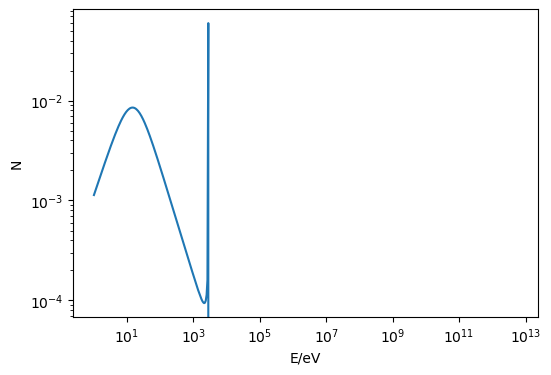

In [14]:
plt.plot(abscs['elecE'], lowengelec_tf_interp.grid_vals[2][20][300])
plt.loglog()
plt.xlabel('E/eV')
plt.ylabel('N')

In [76]:
YHe = 0.24

In [105]:
xH = 0.5
xHe = 0.7 * YHe/(4*(1-YHe))
rs = 1100

In [113]:
t = NNTF(MODEL_DIR+'LEE_R1_run0', 'LEE')

In [114]:
DH_lee_tfgv = lowengelec_tf_interp.get_tf(xH, xHe, rs).grid_vals
t.predict_TF(rs=rs, xH=xH, xHe=xHe)

/zfs/yitians/darkhistory/NNDH/common.py:53: RuntimeWarning: divide by zero encountered in log10
  diff_diag = np.log10(np.abs(np.power(10, pred_tf_diag)-np.power(10, true_tf_diag)))


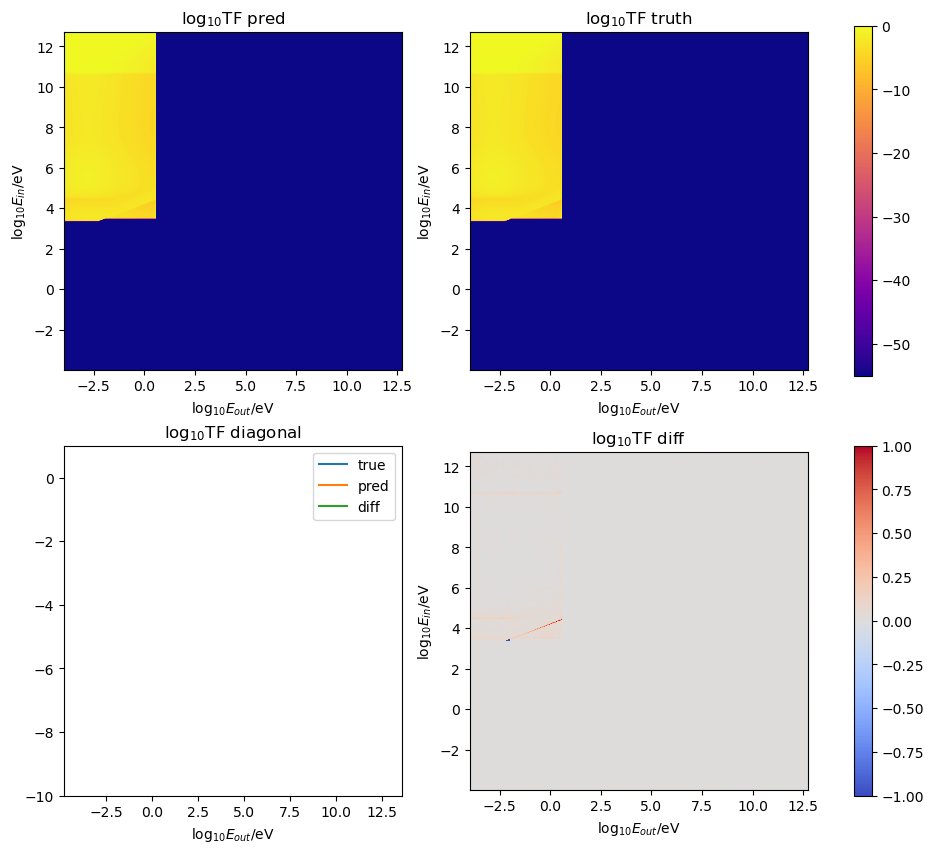

In [115]:
comp_tf(clog10(t.TF), clog10(DH_lee_tfgv))

## check if LB is same for HEP and LEE

In [12]:
tf_helper_data = load_data('tf_helper')
hep_lb_interp = tf_helper_data['hep_lb']

In [13]:
YHe = 0.24

In [26]:
xH = 0.5
xHe = 0.7 * YHe/(4*(1-YHe))
rs = 30

In [27]:
hep_lb_interp.get_val(xH, xHe, rs).item()

387.38635341181816

In [28]:
hep_tfgv = highengphot_tf_interp.get_tf(xH, xHe, rs).grid_vals
lee_tfgv = lowengelec_tf_interp.get_tf(xH, xHe, rs).grid_vals

## LEE structure

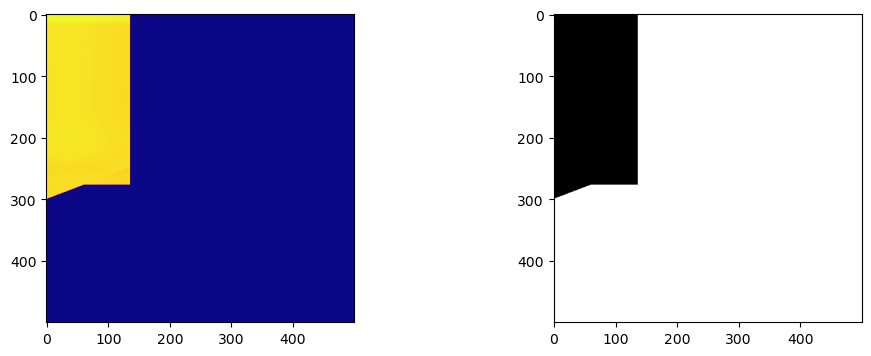

In [38]:
fig, axs = plt.subplots(1, 2, figsize=(12,4))
axs[0].imshow(np.flipud(clog10(lee_tfgv)), cmap='plasma')
axs[1].imshow(np.flipud(t.mask), cmap='binary')

In [42]:
m = (lee_tfgv > 1e-60).astype(int)

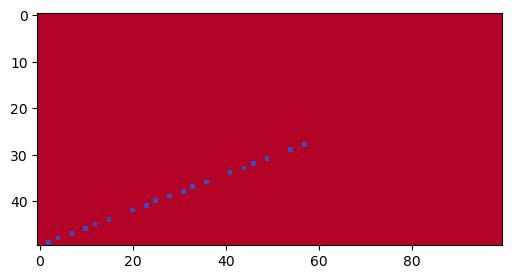

In [51]:
plt.imshow(np.flipud(t.mask-m)[250:300,0:100], cmap='coolwarm')

In [21]:
def find_first(a):
    i = 0
    while i < len(a):
        if a[i] > 1e-60:
            return i
        i += 1
    return -1

In [32]:
print(find_first(hep_tfgv[:,0]))
print(find_first(lee_tfgv[:,120]))

197
223


In [24]:
a = lee_tfgv[-1]
i = len(a)-1
while i >= 0:
    if a[i] > 1e-60:
        print(i)
        break
    i -= 1

135
